# Лекции №1-3. Нейронные сети. Теория.

### Keras

В Keras поддерживаются только следующие архитектуры нейросетей:  
* Feedforward Neural Networks  
* Convolutional Neural Networks  
* Reccurent Neural Networks

Основные модифицируемые (с возможными вариациями) составляющие нейросети и ее обучения:  
* Слои нейросетей (neural layers)  
* Оптимизируемая функция потерь или критерий качества (cost/loss functions)  
* Способ минимизации критерия качества (optimizers)  
* Начальные задания параметров (initialization schemes)  
* Активационные функции (activation functions)  
* Методы борьбы с переобучением (regularization schemes)

#### Keras Sequential
Последовательность шагов:  
1) Описать архитектуру сети;  
2) Описать входные значения;  
3) Описать условия обучения (Compilation);  
4) Обучить (возможно, несколько раз);  
5) Оценить качество модели;  
6) Применить.

* **Optimizers**: rmsprop, adagrad;  
* **Loss functions** (она же **cost function**): categorical_crossentropy, mse;  
* **Metrics** (метрики качества модели, понятные конечному пользователю): accuracy (процент ошибок)

### Метод скорейшего спуска (градиентного спуска)

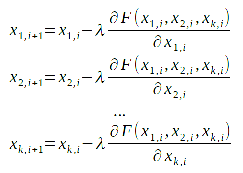

Правила остановки:  
* Превышение заранее заданного числа итераций;  
* Уменьшение функции на каждом шаге меньше, чем заданное значение

Качество сходимости алгоритма на функции ошибок к глобальному минимуму зависит от начальной точки (инициализация).
Особенности обучения нейронных сетей: начальное значение близко к нулю (кроме свободных слагаемых). Это связано с тем, что во всех активационных функциях ноль занимает "нейтральное" положение и, в зависимости от начала обучения, веса могут сдвигаться как в одну сторону от нуля, так и в другую. Например, если бы инициализация при активационной логистической функции производилась бы в точке с заведомо большим значением выхода активации, то как ни изменяй веса, функция будет выдавать 1, что делает данный конкретный нейрон бесполезным.

Малое значение скорости обучения — долгое обучение.  
Большое значение скорости обучения — риск того, что последовательность будет нестабильна из-за возможных оврагов.  
Решение - адаптивная скорость обучения.

Входные значения **стандартизуют**. Это необходимая процедура, когда входные значения по различным признакам численно значительно различаются, и при обучении без стандартизации наибольший вклад будут вносить только те признаки которые численно (но не обязательно по смыслу) больше остальных.  
Новые данные перед подачей на нейросеть **тоже стандартизируют**.

### Optimizers

* ```Adagrad```: будем хранить для каждого параметра сети сумму квадратов его обновлений. Она будет выступать в качестве прокси для типичности: если параметр принадлежит цепочке часто активирующихся нейронов, его постоянно дёргают туда-сюда, а значит сумма быстро накапливается. Параметр, который и так часто обновляется, будем обновлять с меньшим шагом изменения. 
* ```RMSProp```: как и в Adagrad собираемся обновлять меньше веса, которые слишком часто обновляются, но вместо полной суммы обновлений, будем использовать усреднённый по истории квадрат градиента.
* ```Momentum```: Если при градиентном спуске долго движемся по функции ошибок в одном направлении, то можно ускориться (увеличить скорости обучения или ввести к ней доп. коэффициент);  
* ```Nesterov Momentum```: Математически описанный метод Momentum (с теоремой и доказательством ускоренной сходимости);  
* ```Adam```: На большой производной уменьшает скорость обучения;  
* ```NAdam```: Комбинирует Поправку Нестерова с коррекцией от величины производной.

### Loss Functions

* ```mean_squared_error``` (mse):
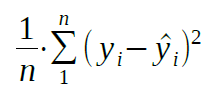

* ```mean_absolute_error```: Если нам критична реакция на нетипичные большие отклонения, то предпочтительно MSE
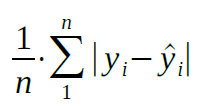

* ```mean_absolute_percentage_error```: То же, что mean_absolute_error, но показывает относительную ошибку.  
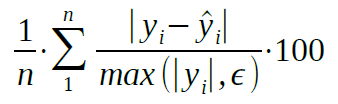

*Примечание*: эпсилон здесь введен, чтобы не было деления на ноль. Далее такие подробности и отрицательные числа под логарифмом опускаются, т.к. учтены в Keras.

* ```mean_squared_logarithmic_error```: Логарифм уменьшает большие значения (также против выбросов)
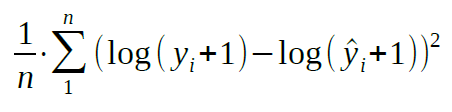

* ```squared_hinge```: $y_i$=[-1:1]
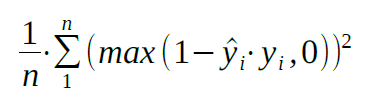

* ```hinge```: $y_i$=[-1:1]
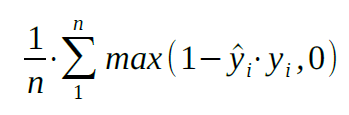

* ```logcosh```: logcosh(x) примерно равен (x ** 2) / 2 для малых x и примерно равен abs(x) - log(2) для больших x. Т.е. на маленьких значениях ведет себя как квадрат, а на малых - как логарифм.
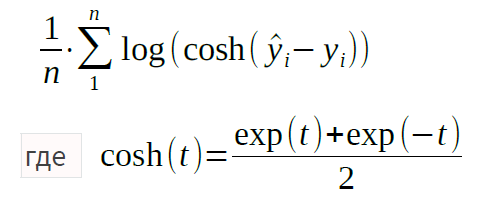

* ```categorical_crossentropy```: классы закодированы числами от 1 до k, k – число классов, $p$^$_i$$_j$ - оценка модели для вероятности объекта i принадлежать классу j. Используем, когда распознаем больше двух классов. Перед этим к откликовым данным необходимо применить команду ```to_categorical```.
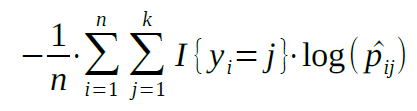

* ```binary_crossentropy```: При наличии строго двух классов.
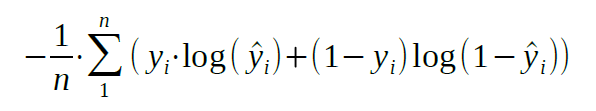

* ```kullback_leibler_divergence```: Используе тся в Variational Auto-Encoders . Не совпадает с расстоянием Кульбака Лейблера, используемом в математической статистике/

* ```poisson```: Используется для задач Пуассоновской регрессии.

* ```cosine_proximity```: Интерпретация - косинус между двумя векторами: реальными ответами и предсказанными ответами.
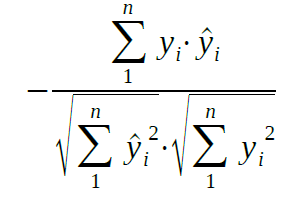

### Inizializers

*Примечание*: с помощью конкретного зерна датчика случайных чисел ```seed``` можно генерить одни и те же случайные числа из раза в раз (удобно, если подобрали конкретные хорошие начальные значения и хотим запомнить). 

* ```Ones```: инициализировать все единицами. Применяется при свободных членах LSTM.

* ```Constant```: Если инициалиируем одинаковыми константами все веса, то и обновляться они будут одинаково, и от них не будет новой информации. Поэтому используется **только для инициализации свободных членов**. Обычно используют маленькое число, например, 0.01.

* ```RandomNormal```: Случайная инициализация весов из нормального распределения с матожиданием mean и стандартным квадратическим отклонением  stddev (выбирается маленьким).  
 *keras.initializers.RandomNormal(mean= 0.0, stddev=0.05, seed=None)*

* ```RandomUniform```: Случайная инициализация числом в интервале между minval и maxval.  
 *keras.initializers.RandomUniform(minval=- 0.05, maxval=0.05, seed=None)*

* ```TruncatedNormal```: Тоже самое, что и RandomNormal, но все значения лежат в пределах 2-х стандартных квадратических отклонений.  
 *keras.initializers.TruncatedNormal(mean= 0.0, stddev=0.05, seed=None)*

### Activation Functions

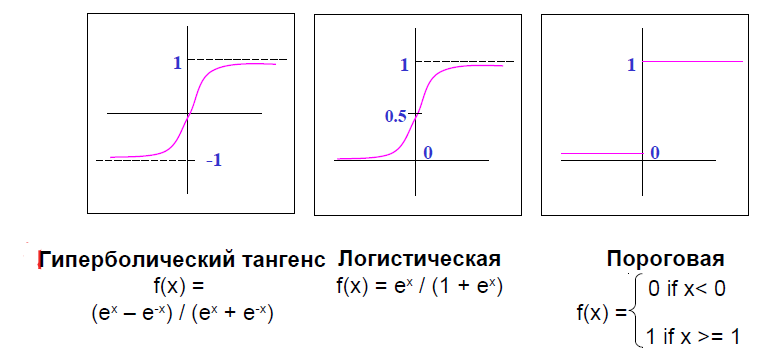

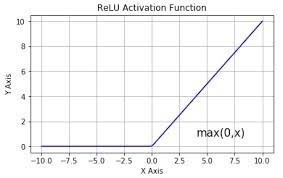

* ```Пороговая функция```:    

\+ Логически наиболее простая  
\- Разрыв производной в нуле

* ```Логистическая (сигмоидальная) функция```:  

\+ Непрерывная производная  
\+ Выходное значение возможно интерпретировать как вероятность  
\+ В районе нуля примерно линейная зависимость входа от выхода  
\- Начиная с некоторого момента не делает различий между входами, когда они или очень большие (всегда выдает число, очень близкое к 1), или когда они слишком маленькие (всегда выдает число, близкое к 0)

* ```Гиперболический тангенс```:  

\+ Все те же плюсы, что и у логистической, но кодируются не 0 и 1, а -1 и 1;

* ```ReLU (Rectified Linear Unit)```:  

\+ Мгновенное вычисление как значения самой функции, так и ее производной (либо 0 либо 1)  
\+ Возможность приблизить остальные активационные функции комбинацией из нескольких ReLU  
\- Разрыв производной в нуле (существуют версии Soft ReLU, в которых в нуле производная не терпит разрыв)

### Пример

Определить, к какому из трех сортов вино относится данное по его химическому анализу

In [1]:
# Импорт библиотек
import numpy
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler

In [2]:
# Импорт обучающей выборки
wine = pd.read_csv('Wine.txt', sep='\t', header=0)
print(wine.shape)
wine.head()

(178, 14)


,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
# Стоит заранее оценить, сбалансированная ли выборка
wine['Desired1(3)'].value_counts(normalize=True)

2    0.398876
0    0.331461
1    0.269663
Name: Desired1(3), dtype: float64

In [4]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = wine['Desired1(3)']
# Предикторы - таблица X
X = wine.drop('Desired1(3)', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345,
                                                    # доля объёма тестового множества
                                                    test_size=0.33)

In [6]:
#  Преобразование pandas dataframe в numpy array, т.к. Keras работает только с данными numpy arrays или tensorflow datasets
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [7]:
# Стандартизуем входные данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Также необходимо учесть, что в данных могут быть выбросы, которые повлияют на преобразования стандартизации, 
# поэтому их необходимо предварительно удалить из данных совсем или заменить более типичными значениями.

In [8]:
# Больше 2-х классов
# Классы не упорядочены
# Теперь каждый отклик содержится не в одном столбце с 3 разными классами, а в 3-х бинарных столбцах, 
# каждый из которых говорит, принадлежит ли вино к данному классу или нет.
y_train_bin = utils.to_categorical(y_train)

y_test_bin = utils.to_categorical(y_test)

Получающиеся выходные предсказанные нейросетью значения также будут представлять собой три числа и будут аналогичны (НО НЕ РАВНЫ!) вероятностям быть отнесенным к каждому из классов. Заметим, что выходные значения могут быть отрицательными. Чтобы эти значения приблизить к интерпретации вероятностей, выходные данные пропускают через слой softmax ($e_i$ = $e_i$/($e_1$ +...+ $e_n$)), делая сумму всех выходов равной 1.  
Чтобы интерпретировать выходные данные напрямую как вероятности, необходимо произвести процедуру калибровки (будет обсуждаться далее).

*Примечание*: выходной слой softmax или логистическую функцию применяют только при задаче классификации. При задаче регрессии оставляют линейный классификатор (т.е. суммируют выходы с некоторыми весами).

In [9]:
y_train_bin[0:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [10]:
# Creating a model
model = Sequential()
model.add(Dense(9, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu', ))
model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Training a model
model.fit(X_train, y_train_bin, epochs=50, batch_size=10)

Epoch 1/50
12/12 [==============================] - 1s 2ms/step - loss: 0.8518 - accuracy: 0.5882
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.6555
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.7452 - accuracy: 0.6807
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.6975
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6975
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7227
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7227
Epoch 8/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7479
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7731
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7899
Epoch 11/50
12/12 [

In [12]:
# evaluate the model
scores = model.evaluate(X_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.9492

Accuracy: 94.92%


In [13]:
# calculate predictions
predictions = model.predict(X_test)
print(predictions[0:5])

[[1.5182052e-04 3.9967788e-05 9.9980825e-01]
 [3.8434405e-02 7.0221174e-01 2.5935382e-01]
 [1.0276562e-01 7.1795648e-01 1.7927785e-01]
 [9.9670804e-01 1.5118697e-03 1.7800839e-03]
 [1.0276562e-01 7.1795648e-01 1.7927785e-01]]


### Пример с использованием других optimizers и initializers

In [14]:
from tensorflow.keras import optimizers, initializers

In [15]:
# Добавим initializers
init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=19) # инициализация весов
init_3 = initializers.Constant(value = 1e-3) # Инициализация свободных членов

alter_model = Sequential()
alter_model.add(Dense(9, input_dim=13, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
alter_model.add(Dense(10, activation='relu', kernel_initializer=init_2, bias_initializer=init_3 ))
alter_model.add(Dense(3, activation='softmax', kernel_initializer=init_2, bias_initializer=init_3))

# Добавим новый optimizer
# lr - learning rate, задается наибольшее ее значение, дальше будет уменьшаться
# decay - шаг уменьшения learning rate
# nesterov - использовать ли поправку Нестерова
sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True)
alter_model.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy'])

c:\users\bokoser_user\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
alter_model.fit(X_train, y_train_bin, epochs=50, batch_size=10)

Epoch 1/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0975 - accuracy: 0.3782
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0911 - accuracy: 0.4118
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0870 - accuracy: 0.4118
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0848 - accuracy: 0.4118
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0838 - accuracy: 0.4118
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0840 - accuracy: 0.4118
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0835 - accuracy: 0.4118
Epoch 8/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0836 - accuracy: 0.4118
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0799 - accuracy: 0.4118
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 1.0783 - accuracy: 0.4118
Epoch 11/50
12/12 [

In [17]:
# evaluate the model
alter_scores = alter_model.evaluate(X_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (alter_scores[1]*100))

2/2 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9831

Accuracy: 98.31%


In [18]:
# calculate predictions
alter_predictions = alter_model.predict(X_test)
print(alter_predictions[0:5])

[[7.3758716e-04 1.3238228e-04 9.9913007e-01]
 [9.5173895e-02 6.9148493e-01 2.1334109e-01]
 [7.4053319e-06 9.9983728e-01 1.5534890e-04]
 [9.9879265e-01 2.3607275e-04 9.7119727e-04]
 [2.9595587e-06 9.9991632e-01 8.0664759e-05]]
